# Unstable photon orbit

In [1]:
import pygro
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['text.usetex'] = False
mpl.rcParams['axes.grid'] = True
mpl.rcParams['grid.color'] = "#cdcdcd"
mpl.rcParams['grid.linestyle'] = ":"
mpl.rcParams['legend.frameon'] = False
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["#767afe", "#2b926c", "#b53546", "#e78b50", "#703676", "#b68ec4", "#37b4b4", "#c8c330"]) 
mpl.rcParams['font.family'] = 'cmr10'
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['axes.formatter.use_mathtext'] = True
mpl.rcParams['axes.unicode_minus']=False

In [3]:
name = "Schwarzschild spacetime"
coordinates = ["t", "r", "theta", "phi"]

transform_functions = [
    "t",
    "r*sin(theta)*cos(phi)",
    "r*sin(theta)*sin(phi)",
    "r*cos(theta)"
]

line_element = "-(1-2*M/r)*dt**2+1/(1-2*M/r)*dr**2+r**2*(dtheta**2+sin(theta)**2*dphi**2)"

metric = pygro.Metric(
    name = name,
    coordinates = coordinates,
    line_element = line_element,
    transform = transform_functions,
    M = 1,
)


(PyGRO) INFO: Initializing Schwarzschild spacetime.
(PyGRO) INFO: Calculating inverse metric.
(PyGRO) INFO: Calculating symbolic equations of motion.
(PyGRO) INFO: Computing helper functions to normalize 4-velocity.
(PyGRO) INFO: The Metric (Schwarzschild spacetime) has been initialized.


In [4]:
geo_engine = pygro.GeodesicEngine(metric)
geo_engine.set_stopping_criterion("r > 2.00001*M", "horizon")

(PyGRO) INFO: Linking Schwarzschild spacetime to the Geodesic Engine
(PyGRO) INFO: Metric linking complete.


In [5]:
r_arr = np.linspace(2.1, 6, 40)

geo_arr = []

observer = pygro.Observer(metric, [0, 2, np.pi/2, 0], coframe = ["sqrt(1-2*M/r)*dt", "-dr/sqrt(1-2*M/r)", "r*sin(theta)*dphi", "-r*dtheta"])

for r in r_arr:
    
    observer.x = [0, r, np.pi/2, 0]
    
    geo = pygro.Geodesic("null", geo_engine, verbose = False)
    geo.initial_x = observer.x
    geo.initial_u = observer.from_f2(0, 0, type = geo.type)
    
    geo_engine.integrate(geo, 100, 0.0001, verbose = False, accuracy_goal = 16, precision_goal = 16, hmax = 0.001 if r == 3 else 100) 

    geo_arr.append(geo)

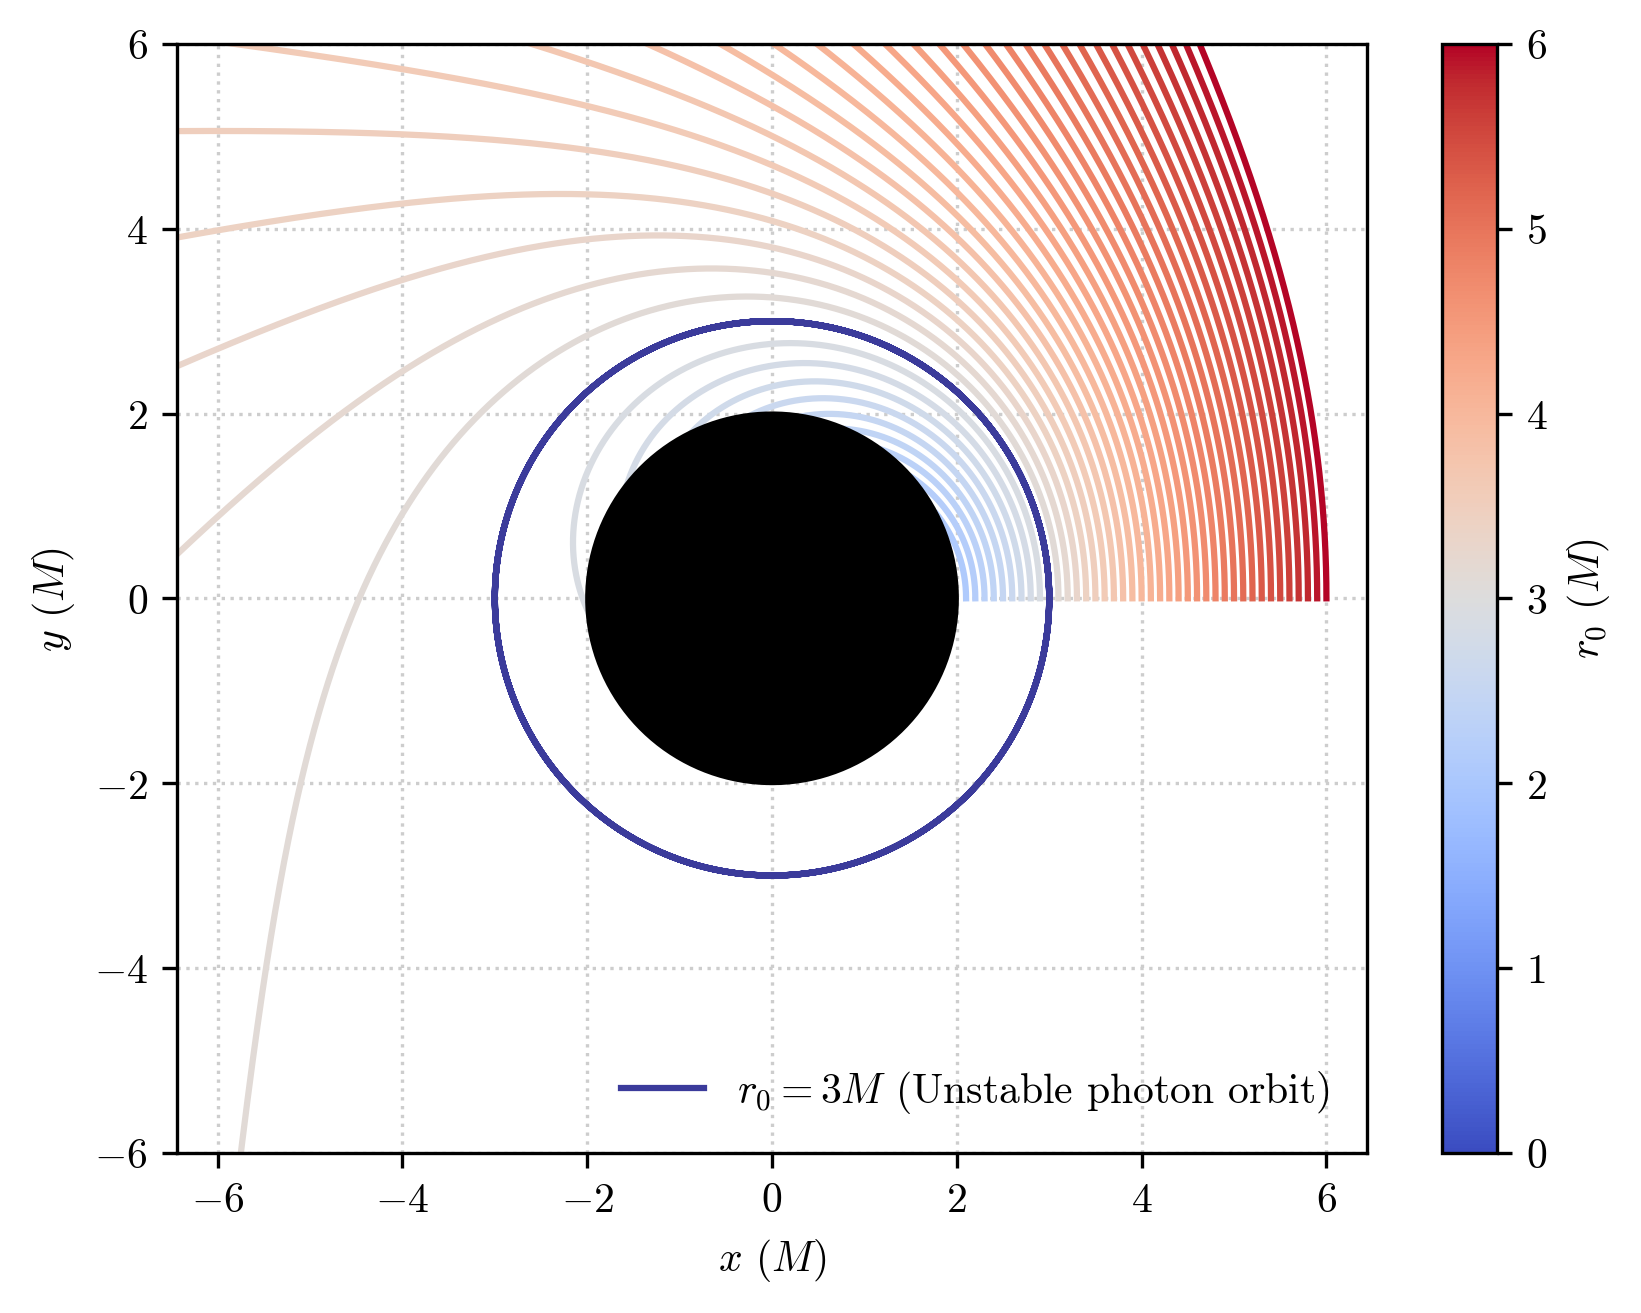

In [10]:
fig, ax = plt.subplots()


cmap = plt.get_cmap('coolwarm')
norm = mpl.colors.Normalize(vmin=0, vmax=6)
mappable = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

for geo in geo_arr:
    t, x, y, z = metric.transform(geo.x.T)
    
    ax.plot(
        x, y,
        color = mappable.to_rgba(geo.initial_x[1]) if geo.initial_x[1] != 3 else "#3b3b9b",
        label = r"$r_0 = 3M$ (Unstable photon orbit)" if geo.initial_x[1] == 3 else None
    )

ax.axis('equal')

theta = np.linspace(0, 2*np.pi, 150)
x_bh = 2*np.cos(theta)
y_bh = 2*np.sin(theta)

ax.fill(x_bh, y_bh, color = "k", zorder = 100)

lim = 6

ax.set_xlim(-lim, lim)
ax.set_ylim(-lim, lim)

ax.set_axisbelow(True)

ax.set_xlabel('$x$ ($M$)')
ax.set_ylabel('$y$ ($M$)')

ax.legend()

fig.colorbar(mappable, ax = ax, label = r"$r_0$ ($M$)")
plt.show()

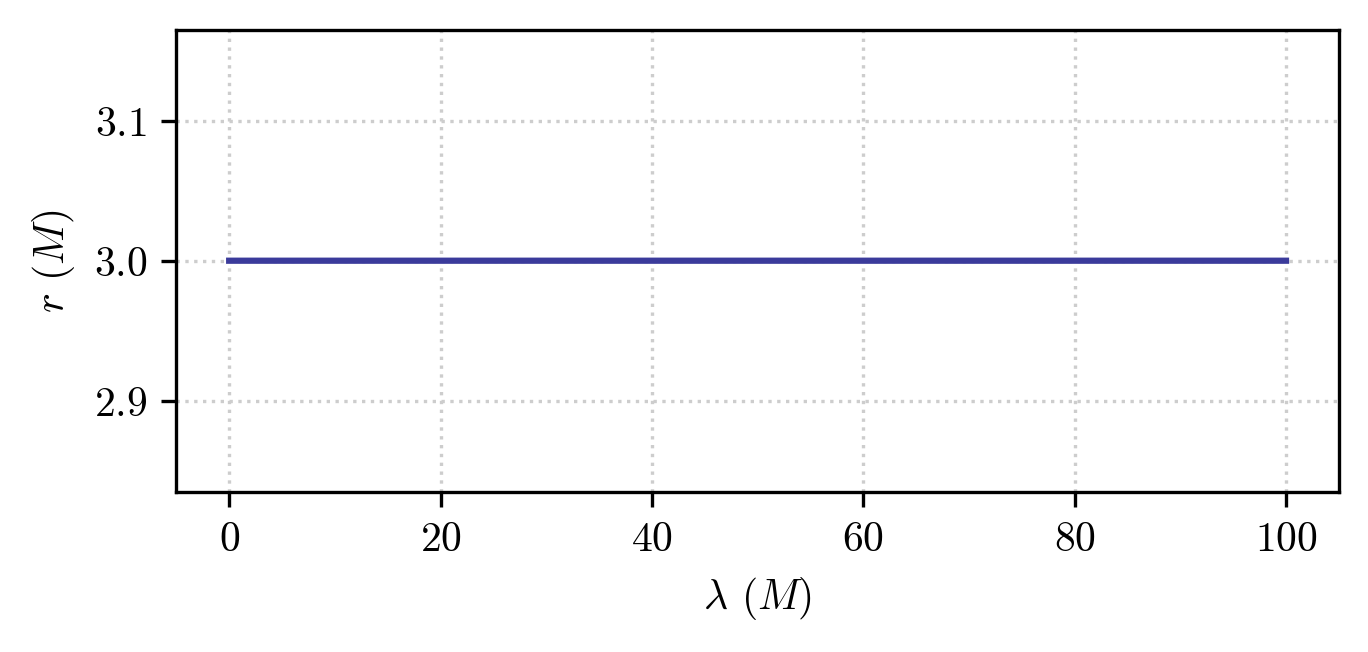

In [9]:
fig, ax = plt.subplots(figsize = (5,2))

ax.plot(geo_arr[9].tau, geo_arr[9].x[:,1], color  = "#3b3b9b")

ax.set_xlabel(r"$\lambda$ ($M$)")
ax.set_ylabel(r"$r$ ($M$)")

plt.show()